# Analyzing the hosps_pop_norm
This file highlights how intense was flu activity per 100,000 people and this dataset allows us to compare flu severity across states on an equal footing by converting raw hospitalizations into per-capita rates while preserving seasonal structure

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.getcwd()


'C:\\Users\\Amandeep\\Desktop\\ResearchProject\\data-driven-svd-regression\\exploratory_analysis'

In [3]:
df = pd.read_csv("../analysis_data/hosps_pop_norm.csv")
df.head()

,date,location,location_name,population,value,season,season_week,epiyear,epiweek,weekly_rate,hosps_pop_norm
0,2020-10-24,01,Alabama,5108468,3.0,2020/2021,3,2020,43,0.058165,0.058726
1,2020-10-31,01,Alabama,5108468,18.0,2020/2021,4,2020,44,0.348993,0.352356
2,2020-11-07,01,Alabama,5108468,21.0,2020/2021,5,2020,45,0.407158,0.411082
3,2020-11-14,01,Alabama,5108468,25.0,2020/2021,6,2020,46,0.484712,0.489384
4,2020-11-21,01,Alabama,5108468,11.0,2020/2021,7,2020,47,0.213273,0.215329


In [5]:
print(df.columns)
print(df.shape)
print(df.describe())
print(df.isna().sum())


Index(['date', 'location', 'location_name', 'population', 'value', 'season',
       'season_week', 'epiyear', 'epiweek', 'weekly_rate', 'hosps_pop_norm'],
      dtype='object')
(9172, 11)
         population         value  season_week      epiyear      epiweek  \
count  9.172000e+03   9172.000000  9172.000000  9172.000000  9172.000000   
mean   1.277482e+07    239.776712    15.500545  2022.765700    25.654601   
std    4.551332e+07   1678.171420     9.575148     1.546343    18.311840   
min    5.840570e+05      0.000000     0.000000  2020.000000     1.000000   
25%    1.964726e+06      5.000000     7.000000  2021.000000     9.000000   
50%    4.526154e+06     23.000000    15.000000  2023.000000    18.000000   
75%    7.812880e+06     94.000000    24.000000  2024.000000    45.000000   
max    3.349149e+08  55483.000000    32.000000  2025.000000    53.000000   

       weekly_rate  hosps_pop_norm  
count  9172.000000     9172.000000  
mean      1.903879        1.927057  
std       3.5653

# Average flu curve across all states

<Axes: title={'center': 'Average Population-Normalized Flu Hospitalizations'}, xlabel='Season Week (0 = start of flu season)', ylabel='Hospitalizations per 100k'>

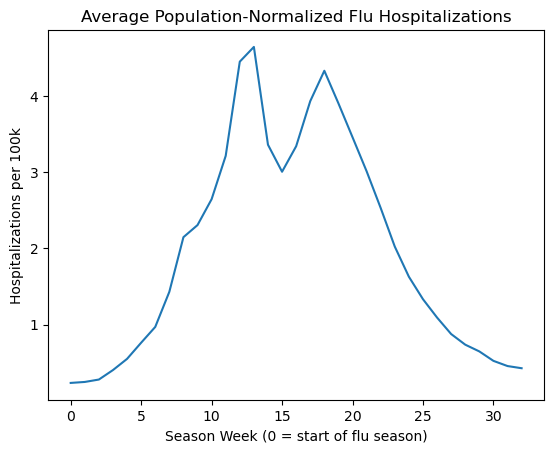

In [6]:
df.groupby("season_week")["hosps_pop_norm"].mean().plot(
    title="Average Population-Normalized Flu Hospitalizations",
    xlabel="Season Week (0 = start of flu season)",
    ylabel="Hospitalizations per 100k"
)


# The Average Flu Curve
This plot computes the average population-normalized hospitalization rate for each season week across all states.It groups all the data by the "Season Week" to see the general trend of the virus.  
By normalizing for population, we see a very clear, universal "bell curve".The flu starts to rise in early winter, Peaks during mid-winter and Gradually declines toward the end.

# Comparing states fairly(PA Vs CT)

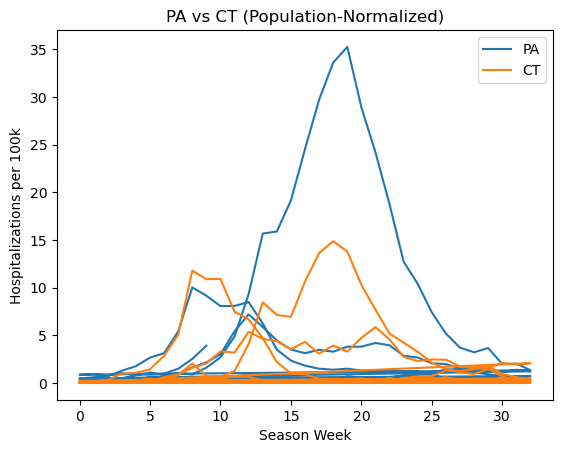

In [10]:
states = df[df["location"].isin(["42", "09"])]

for code, label in [("42", "PA"), ("09", "CT")]:
    subset = states[states["location"] == code]
    plt.plot(subset["season_week"], subset["hosps_pop_norm"], label=label)

plt.legend()
plt.xlabel("Season Week")
plt.ylabel("Hospitalizations per 100k")
plt.title("PA vs CT (Population-Normalized)")
plt.show()


# Fair Comparison (Pennsylvania vs. Connecticut)
This plot compares the normalized data for Pennsylvania (PA) and Connecticut (CT).  
In 02_explore_formatted_flu.csv, Pennsylvania's numbers always looked massive compared to Connecticut's simply because of population difference.  
Because the data is normalized, differences now reflect flu intensity rather than population size. They follow the same timing and reach similar peaks per 100,000 people.

# Comparing Different Size States
 ## CA(Big) Vs AK(Small)

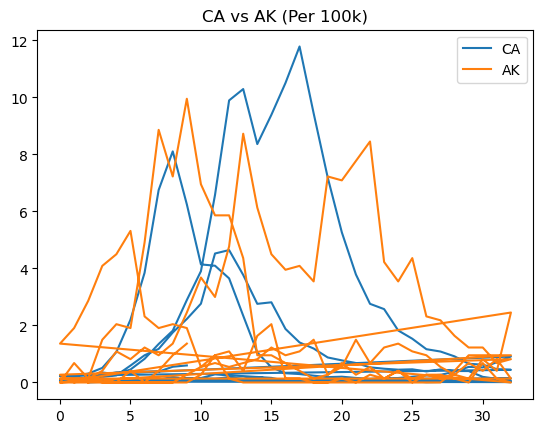

In [11]:
states = df[df["location"].isin(["06", "02"])]

for code, label in [("06", "CA"), ("02", "AK")]:
    subset = states[states["location"] == code]
    plt.plot(subset["season_week"], subset["hosps_pop_norm"], label=label)

plt.legend()
plt.title("CA vs AK (Per 100k)")
plt.show()


# CA vs AK
In this plot we compare a large state (California) with a small state (Alaska).   
This illustrates that even with vastly different populations, the normalized data shows they experience flu "waves" in a synchronized manner.  
We can infer that flu severity depends more on seasonal timing and regional outbreaks than on the size of the state itself.